In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

SEED = 462
np.random.seed(SEED)

data_path = os.path.join("..", "data", "tabular")

In [9]:
class Dataset:
    """
    This class is taken directly from our previous submission.
    """
    def __init__(self, train_path=None, test_path=None):
        self.train_path = train_path
        self.test_path = test_path
    
    def load_csv(self, path):
        data = pd.read_csv(path).to_numpy()
        X, Y_str = data[:, :-1], data[:, -1]  # separate data and target
        n_examples = len(Y_str)
        Y = np.zeros(n_examples)
        for i in range(n_examples):
            category = Y_str[i]
            if category == "banana":
                Y[i] = 0
            elif category == "carrot":
                Y[i] = 1
            elif category == "cucumber":
                Y[i] = 2
            elif category == "mandarin":
                Y[i] = 3
            else:
                Y[i] = 4
        
        return X.astype(float), Y.astype(float)
    
    def get_data(self):
        X_train, Y_train = self.load_csv(self.train_path)
        X_test, Y_test   = self.load_csv(self.test_path)
        
        return (X_train, Y_train), (X_test, Y_test)

In [10]:
# Load the dataset
dataset = Dataset(
    train_path=os.path.join(data_path, "train_processed.csv"),
    test_path=os.path.join(data_path, "test_processed.csv")
)

(X_train, y_train), (X_test, y_test) = dataset.get_data()

# Print out the data frame for the dataset
feat_cols_train = ['feature '+str(i) for i in range(X_train.shape[1])]
normalised_train = pd.DataFrame(X_train,columns=feat_cols_train)
normalised_train.tail()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 96,feature 97,feature 98,feature 99,feature 100,feature 101,feature 102,feature 103,feature 104,feature 105
3485,0.037058,-0.892437,-0.853279,-0.785172,-0.974276,-0.894686,-0.194773,-0.100563,-0.303624,-0.602996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3486,-0.366712,-0.236922,-0.020249,0.335127,0.591421,0.623267,0.451739,0.034959,-0.316667,-0.155741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3487,-1.022839,-0.930255,-0.954252,-0.988863,-0.681503,-0.631240,-0.617492,-0.494809,-1.503547,-1.602745,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3488,-0.909278,-0.842013,-0.828035,-0.925209,-0.974276,-0.869596,-0.891016,-0.938336,-1.020969,-1.037098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3489,1.172662,1.200169,1.241917,0.958929,0.515046,-0.141982,-0.754254,-1.332582,-0.603605,-0.747697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Experimenting with Principle Components

# # n_components decides how many first n columns for U and V and singular values from Σ to keep 
# pca_train = PCA(n_components=20)

# principal_components_train = pca_train.fit_transform(X_train)
# principal_train_Df = pd.DataFrame(data = principal_components_train)
# principal_train_Df.columns = [f'PC {i}' for i in range(len(principal_train_Df.columns))]   

# print('Explained variability per principal component: {}'.format(pca_train.explained_variance_ratio_))

# principal_train_Df.tail()

Explained variability per principal component: [0.44218898 0.11171843 0.06066092 0.0472862  0.03861554 0.03319616
 0.02295524 0.02206456 0.01758337 0.0151256  0.01242168 0.01048619
 0.00988633 0.00966476 0.00871396 0.00832787 0.00766591 0.00701214
 0.0055349  0.00518588]


,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19
3485,-5.353066,1.658779,0.139394,2.389450,0.537076,0.518602,-0.166838,-0.243960,-0.677697,-1.110615,0.367755,0.570407,0.006216,0.242245,0.753448,1.370222,-0.067520,-0.702958,0.181952,-0.470893
3486,-4.709475,3.899986,-1.583527,-0.536559,0.473616,-1.601771,0.143427,0.165950,0.426160,-0.357643,-0.021572,0.295988,0.170259,0.596298,0.790717,0.821831,-0.597661,0.000561,-0.627153,-0.085826
3487,-4.335660,-3.332717,-3.443294,0.839610,-1.947579,0.982126,1.171903,-1.192766,-1.653330,0.715533,-1.337529,-0.112389,0.964487,-1.170097,0.796918,0.004155,-0.641661,-0.388505,0.389667,0.112221
3488,1.376255,-5.119061,-1.278018,-1.155185,4.806380,0.613720,0.020980,-0.748997,-1.279468,-0.629356,-0.420359,0.046158,-1.183906,-0.380173,1.101743,-0.078592,-0.139937,0.184975,-0.972354,0.622655
3489,-5.360911,1.662636,0.519372,0.245089,-0.445181,-1.942338,-0.674253,-0.262029,0.512072,0.624212,0.433203,0.254985,-0.845845,-1.042024,0.620276,-1.171164,1.760789,-0.056277,-1.618363,1.196491


---
Transforming: $X_{PCA} = XV_k$

Inverse transforming $\hat{X} = XV_kV_k^T$

In [37]:
pca_train = PCA(n_components=None)
pca_train.fit(X_train)

# Reconstruction Error
reconstructed_errors = []
explained_variances = []
k_range = range(1, X_train.shape[1] + 1)

for k in k_range:
    # Init PCA with k components
    pca = PCA(n_components=k)
    
    # Fit n' Transform
    X_reduced = pca.fit_transform(X_train)

    # Reconstruction Error
    X_reconstruct = pca.inverse_transform(X_reduced)
    # Calculate squared error for each data point
    mse = mean_squared_error(X_train, X_reconstruct)
    reconstructed_errors.append(mse)

    # Explained Variance
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Determine the exact value for 95% variance
cumulative_variance = np.cumsum(pca_train)

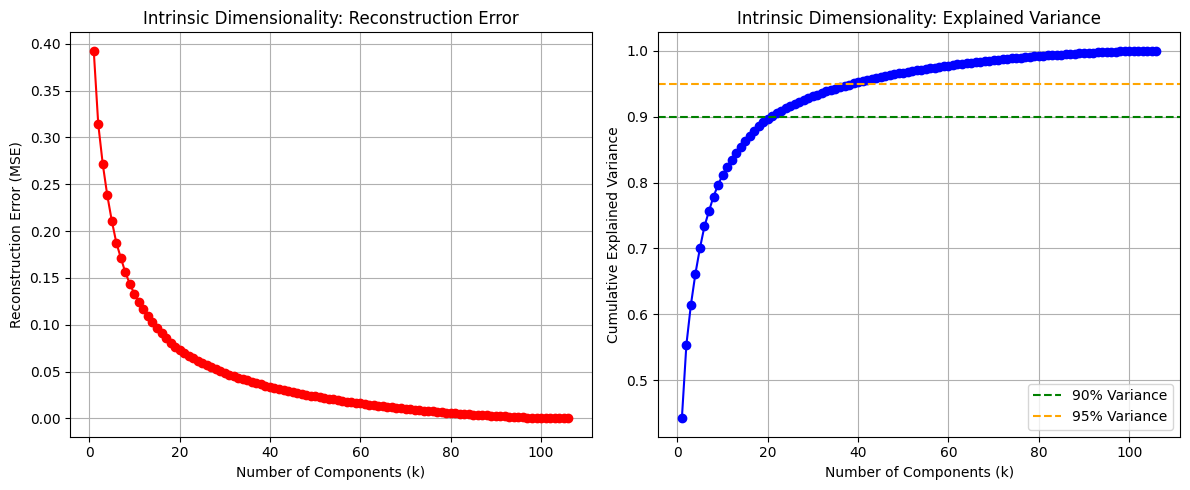

In [38]:
# Plotting Reconstruction Error
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, reconstructed_errors, marker='o', color='red')
plt.xlabel('Number of Components (k)')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Intrinsic Dimensionality: Reconstruction Error')
plt.grid(True)

# Plotting Explained Variance
plt.subplot(1, 2, 2)
plt.plot(k_range, explained_variances, marker='o', color='blue')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance') # Threshold line
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% Variance') # Threshold line
plt.xlabel('Number of Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Intrinsic Dimensionality: Explained Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Determine exact k for 95% variance by using argmax
k_95 = np.argmax(cumulative_variance >= 0.95) + 1  # +1 because index starts at 0

print(f"Optimal k for 95% variance: {k_95}")

# Create reduced datasets through new PCA with k components
pca_final = PCA(n_components=k_95)

# Fit on Train, Transform on Train AND Test
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)  # Important: Do NOT fit on test data!

print(f"Original Shape: {X_train.shape}")
print(f"Reduced Shape:  {X_train_pca.shape}")

# # 3. Re-Run Benchmarking (From Task 1)
# # Reuse the 'configs' dictionary and loop you wrote in Phase 2
# # But pass (X_train_pca, y_train) instead of the original data.

# print("\nStarting Benchmarking on PCA Features...")
# # ... [Insert your existing benchmarking loop here] ...
# # ... [Store results in a NEW list, e.g., results_pca] ...

Optimal k for 95% variance: 39
Original Shape: (3490, 106)
Reduced Shape:  (3490, 39)

Starting Benchmarking on PCA Features...
